# Guided Project: Web Data Pipeline

## Overview

En este proyecto, voy a analizar diferentes características básicas de todos los países del mundo, con el fin de poder ver las diferencias entre ellos en las principales magnitudes de libertad, y cómo han evolucionado estas en el tiempo.
EL informe oficial completo se puede encontrar en el siguiente enlace: https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2018-revised.pdf

## Acquisition

A través de Kaggle, he descargado el archivo "The Human Freedom Index", el cual muestra una medida global de la libertad personal, civil y económica.

Una vez descargado el archivo, a través de Jupyter Notebook lo he abierto para empezar a trabajar en él.

In [285]:
import pandas as pd
import numpy as np
from string import ascii_letters
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from numpy import median

data = pd.read_csv('hfi_cc_2018.csv')
data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


## Wrangling

Procedo a ver las columnas que tiene y qué información contiene cada una. Para esto me he apoyado principalmente en Kaggle y en la descripción que hacen de cada columna.

In [286]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0].head()

pf_rol_procedural    578
pf_rol_civil         578
pf_rol_criminal      578
pf_rol                80
pf_ss_homicide        80
dtype: int64

In [287]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

A traveś de Python me voy quedando con las columnas que más me interesan, y les cambio el nombre para hacer más legible el archivo.
Las columnas con las que me quedo son las siguientes:
    Civil_justice
    Freedom_of_association
    Freedom_of_expression
    Same_sex_relationships
    Personal_Freedom
    Economic_Freedom
    Human_Freedom

In [288]:
new_columns = ['year', 'countries', 'pf_rol_civil', 'pf_association_association', 'pf_expression', 
               'pf_identity_sex', 'pf_score', 'ef_score', 'hf_score']
data = data[new_columns]
data.head()

,year,countries,pf_rol_civil,pf_association_association,pf_expression,pf_identity_sex,pf_score,ef_score,hf_score
0,2016,Albania,4.547244,10.0,8.607143,10.0,7.596281,7.54,7.568140
1,2016,Algeria,NaN,5.0,7.380952,0.0,5.281772,4.99,5.135886
2,2016,Angola,NaN,2.5,6.452381,0.0,6.111324,5.17,5.640662
3,2016,Argentina,5.791960,7.5,8.738095,10.0,8.099696,4.84,6.469848
4,2016,Armenia,NaN,7.5,7.154762,10.0,6.912804,7.57,7.241402


In [289]:
data = data.rename(index=str, columns={"year": "Year", "countries": "Country", 
                                       "pf_rol_civil": "Civil_justice", 
                                       "pf_association_association": "Freedom_of_association",
                                       "pf_expression": "Freedom_of_expression", 
                                       "pf_identity_sex": "Same_sex_relationships", 
                                       "pf_score": "Personal_Freedom",
                                       "ef_score": "Economic_Freedom",
                                       "hf_score": "Human_Freedom"})
data.head()

,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
0,2016,Albania,4.547244,10.0,8.607143,10.0,7.596281,7.54,7.568140
1,2016,Algeria,NaN,5.0,7.380952,0.0,5.281772,4.99,5.135886
2,2016,Angola,NaN,2.5,6.452381,0.0,6.111324,5.17,5.640662
3,2016,Argentina,5.791960,7.5,8.738095,10.0,8.099696,4.84,6.469848
4,2016,Armenia,NaN,7.5,7.154762,10.0,6.912804,7.57,7.241402


In [290]:
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

Civil_justice             578
Freedom_of_association    329
Freedom_of_expression      80
Same_sex_relationships     80
Personal_Freedom           80
Economic_Freedom           80
Human_Freedom              80
dtype: int64

Una vez tengo las columnas que quiero, veo si existe algún elemento duplicado, aunque como era de esperar, no hay ninguno.

In [291]:
before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


Ahora miro las filas que tengan NaN's para deshacerme de ellas.

In [292]:
data[data.isnull().any(axis=1)].head()

,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
1,2016,Algeria,NaN,5.0,7.380952,0.0,5.281772,4.99,5.135886
2,2016,Angola,NaN,2.5,6.452381,0.0,6.111324,5.17,5.640662
4,2016,Armenia,NaN,7.5,7.154762,10.0,6.912804,7.57,7.241402
7,2016,Azerbaijan,NaN,2.5,4.708462,10.0,5.676553,6.49,6.083277
8,2016,Bahamas,6.008696,NaN,8.895833,10.0,7.454538,7.34,7.397269


In [293]:
data = data.dropna()
data.head()

,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
0,2016,Albania,4.547244,10.0,8.607143,10.0,7.596281,7.54,7.568140
3,2016,Argentina,5.791960,7.5,8.738095,10.0,8.099696,4.84,6.469848
5,2016,Australia,7.525648,10.0,9.392857,10.0,9.184438,7.98,8.582219
6,2016,Austria,7.872188,10.0,9.333333,10.0,9.246948,7.58,8.413474
10,2016,Bangladesh,3.712171,5.0,7.041990,5.0,5.302600,6.30,5.801300


## Analysis

A partir de aquí empiezo a seleccionar la información con la que me quiero quedar. En este caso, con información del año 2016, el último año disponible, para saber cuales fueron los países con mayor y menor libertad,medido en la columna Human Freedom.

In [294]:
years = data["Year"]
drop_cols = list(years[years < 2016].index)
data_2016 = data.drop(drop_cols, axis=0)

data_2016_top5 = data_2016.sort_values(by='Human_Freedom', ascending=False).head()
data_2016_last5 = data_2016.sort_values(by='Human_Freedom', ascending=True).head()

display(data_2016_top5)
display(data_2016_last5)

,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
107,2016,New Zealand,7.877339,10.0,9.523810,10.0,9.284819,8.49,8.887410
63,2016,Hong Kong,7.724473,7.5,8.666667,10.0,8.583680,8.97,8.776840
5,2016,Australia,7.525648,10.0,9.392857,10.0,9.184438,7.98,8.582219
27,2016,Canada,7.181646,10.0,9.511905,10.0,9.151727,7.98,8.565863
106,2016,Netherlands,8.714600,10.0,9.726190,10.0,9.398842,7.71,8.554421


,Year,Country,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
157,2016,Venezuela,3.271891,10.0,5.109508,10.0,5.521449,2.88,4.200724
44,2016,Egypt,3.763257,5.0,6.460099,0.0,3.894554,5.72,4.807277
68,2016,Iran,5.211233,2.5,5.357637,0.0,4.532449,6.03,5.281225
47,2016,Ethiopia,3.896895,0.0,5.252983,0.0,5.064090,5.73,5.397045
103,2016,Myanmar,3.657112,7.5,7.544895,5.0,5.463361,5.42,5.441680


Así mismo, hago un breve resumen de las características de las principales métricas de ambos grupos para, a través de un simple vistazo, ver la principales diferencias.

In [295]:
important_columns = ["Year", "Country", "Civil_justice", "Freedom_of_association", "Freedom_of_expression", 
                     "Same_sex_relationships", "Personal_Freedom","Economic_Freedom","Human_Freedom"]
stats_top = data_2016_top5[important_columns].describe().transpose()
stats_last = data_2016_last5[important_columns].describe().transpose()

display(stats_top)
display(stats_last)

,count,mean,std,min,25%,50%,75%,max
Year,5.0,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
Civil_justice,5.0,7.804741,0.571336,7.181646,7.525648,7.724473,7.877339,8.714600
Freedom_of_association,5.0,9.500000,1.118034,7.500000,10.000000,10.000000,10.000000,10.000000
Freedom_of_expression,5.0,9.364286,0.407953,8.666667,9.392857,9.511905,9.523810,9.726190
Same_sex_relationships,5.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Personal_Freedom,5.0,9.120701,0.315323,8.583680,9.151727,9.184438,9.284819,9.398842
Economic_Freedom,5.0,8.226000,0.502623,7.710000,7.980000,7.980000,8.490000,8.970000
Human_Freedom,5.0,8.673351,0.150444,8.554421,8.565863,8.582219,8.776840,8.887410


,count,mean,std,min,25%,50%,75%,max
Year,5.0,2016.000000,0.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
Civil_justice,5.0,3.960078,0.737141,3.271891,3.657112,3.763257,3.896895,5.211233
Freedom_of_association,5.0,5.000000,3.952847,0.000000,2.500000,5.000000,7.500000,10.000000
Freedom_of_expression,5.0,5.945025,1.042464,5.109508,5.252983,5.357637,6.460099,7.544895
Same_sex_relationships,5.0,3.000000,4.472136,0.000000,0.000000,0.000000,5.000000,10.000000
Personal_Freedom,5.0,4.895181,0.684909,3.894554,4.532449,5.064090,5.463361,5.521449
Economic_Freedom,5.0,5.156000,1.290477,2.880000,5.420000,5.720000,5.730000,6.030000
Human_Freedom,5.0,5.025590,0.525481,4.200724,4.807277,5.281225,5.397045,5.441680


Y eso ahora cuando empiezo a hacer el anaĺisis de los 3 países que me interesan de este dataset, que son Nueva Zelanda, por ser el número 1, Venezuela por ser el último, y España por ser mi país.

Lo que voy a hacer es ver la evolución de la Libertad Total y de la Justicia Civil a lo largo de los últimos 8 años,viendo la variación entre años y entre 2008 y 2016.

También hago un gráfico de barras para mostrar de forma gráfica la evolución de la variable total de Libertad.

Y termino el análisis anual midiendo lo que han variado las variables Justicia Social y Libertad Humana a lo largo de los últimos años para cada uno de los 3 países.

,Civil_justice,Human_Freedom
Year,,
2016,7.877339,8.887410
2015,7.840253,8.876890
2014,7.775732,8.921386
2013,7.500000,8.868585
2012,7.500000,8.784639
2011,7.599611,8.791730
2010,7.599611,8.879077
2009,7.599611,8.797717
2008,7.599611,8.910542


,Civil_justice,Human_Freedom
Year,,
2016,NaN,NaN
2015,-0.004708,-0.001184
2014,-0.008229,0.005013
2013,-0.035461,-0.005918
2012,0.000000,-0.009465
2011,0.013281,0.000807
2010,0.000000,0.009935
2009,0.000000,-0.009163
2008,0.000000,0.012824


La variación ANUAL de la Justicia Social y de la Libertad en Nueva Zelanda durante los últimos 8 años ha sido respectivamente de un 0.45%, y de un -0.03%.
La variación TOTAL de la Justicia Social y de la Libertad en NUeva Zelanda entre 2008 y 2016 ha sido respectivamente de un 3.65%, y de un -0.26%.


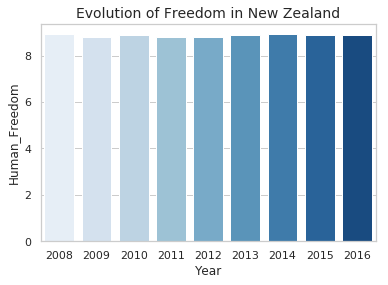

In [296]:
data_new_zealand = data[(data['Country']=='New Zealand')]
data_new_zealand = data_new_zealand.sort_values(by='Year', ascending=False)

columns_analysis = ['Year', 'Civil_justice', 'Human_Freedom']
stats_new_zealand = data_new_zealand[columns_analysis]
stats_new_zealand = stats_new_zealand.set_index('Year')

display(stats_new_zealand)
display(stats_new_zealand.pct_change())

title = 'Evolution of Freedom in New Zealand'
sns.set(style="whitegrid")
zea_freedom = sns.barplot(x="Year", y="Human_Freedom", data=data_new_zealand, palette="Blues")
plt.title(title, fontsize=14)

zea_civil_year = ((stats_new_zealand.loc[2016, 'Civil_justice']/stats_new_zealand.loc[2008, 'Civil_justice'])**(1/8)-1)*100
zea_civil = ((stats_new_zealand.loc[2016, 'Civil_justice']/stats_new_zealand.loc[2008, 'Civil_justice'])-1)*100
zea_freedom_year = ((stats_new_zealand.loc[2016, 'Human_Freedom']/stats_new_zealand.loc[2008, 'Human_Freedom'])**(1/8)-1)*100
zea_freedom = ((stats_new_zealand.loc[2016, 'Human_Freedom']/stats_new_zealand.loc[2008, 'Human_Freedom'])-1)*100

print("La variación ANUAL de la Justicia Social y de la Libertad en Nueva Zelanda durante los últimos 8 años ha sido respectivamente de un " + str(round(zea_civil_year, 2)) + "%, y de un " + str(round(zea_freedom_year, 2)) + "%.")
print("La variación TOTAL de la Justicia Social y de la Libertad en NUeva Zelanda entre 2008 y 2016 ha sido respectivamente de un " + str(round(zea_civil, 2)) + "%, y de un " + str(round(zea_freedom, 2)) + "%.")

,Civil_justice,Human_Freedom
Year,,
2016,6.596637,8.159107
2015,6.512283,8.175966
2014,6.418713,8.197269
2013,6.200000,8.005897
2012,6.200000,8.016794
2011,6.456055,8.125422
2010,6.456055,8.246200
2009,6.456055,8.101026
2008,6.456055,8.247249


,Civil_justice,Human_Freedom
Year,,
2016,NaN,NaN
2015,-0.012788,0.002066
2014,-0.014368,0.002606
2013,-0.034074,-0.023346
2012,0.000000,0.001361
2011,0.041299,0.013550
2010,0.000000,0.014864
2009,0.000000,-0.017605
2008,0.000000,0.018050


La variación ANUAL de la Justicia Social y de la Libertad en Venezuela durante los últimos 8 años ha sido respectivamente de un 0.27%, y de un -0.13%.
La variación TOTAL de la Justicia Social y de la Libertad en Venezuela entre 2008 y 2016 ha sido respectivamente de un 2.18%, y de un -1.07%.


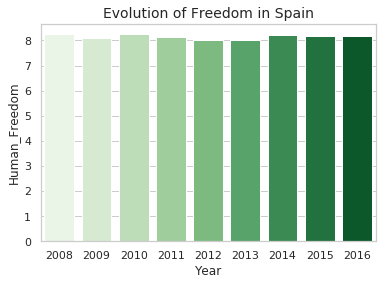

In [297]:
data_spain = data[(data['Country']=='Spain')]
data_spain = data_spain.sort_values(by='Year', ascending=False)

stats_spain = data_spain[columns_analysis]
stats_spain = stats_spain.set_index('Year')

display(stats_spain)
display(stats_spain.pct_change())

title = 'Evolution of Freedom in Spain'
sns.set(style="whitegrid")
spa_freedom = sns.barplot(x="Year", y="Human_Freedom", data=data_spain, palette="Greens")
plt.title(title, fontsize=14)

spa_civil_year = ((stats_spain.loc[2016, 'Civil_justice']/stats_spain.loc[2008, 'Civil_justice'])**(1/8)-1)*100
spa_civil = ((stats_spain.loc[2016, 'Civil_justice']/stats_spain.loc[2008, 'Civil_justice'])-1)*100
spa_freedom_year = ((stats_spain.loc[2016, 'Human_Freedom']/stats_spain.loc[2008, 'Human_Freedom'])**(1/8)-1)*100
spa_freedom = ((stats_spain.loc[2016, 'Human_Freedom']/stats_spain.loc[2008, 'Human_Freedom'])-1)*100

print("La variación ANUAL de la Justicia Social y de la Libertad en Venezuela durante los últimos 8 años ha sido respectivamente de un " + str(round(spa_civil_year, 2)) + "%, y de un " + str(round(spa_freedom_year, 2)) + "%.")
print("La variación TOTAL de la Justicia Social y de la Libertad en Venezuela entre 2008 y 2016 ha sido respectivamente de un " + str(round(spa_civil, 2)) + "%, y de un " + str(round(spa_freedom, 2)) + "%.")

,Civil_justice,Human_Freedom
Year,,
2016,3.271891,4.200724
2015,2.920870,4.241750
2014,3.485510,4.573730
2013,3.300000,5.013857
2012,3.300000,5.225650
2011,3.781688,5.332458
2010,3.781688,5.156619
2009,3.781688,5.283514
2008,3.781688,5.257879


,Civil_justice,Human_Freedom
Year,,
2016,NaN,NaN
2015,-0.107284,0.009766
2014,0.193312,0.078265
2013,-0.053223,0.096229
2012,0.000000,0.042242
2011,0.145966,0.020439
2010,0.000000,-0.032975
2009,0.000000,0.024608
2008,0.000000,-0.004852


La variación ANUAL de la Justicia Social y de la Libertad en Venezuela durante los últimos 8 años ha sido respectivamente de un -1.79%, y de un -2.77%.
La variación TOTAL de la Justicia Social y de la Libertad en Venezuela entre 2008 y 2016 ha sido respectivamente de un -13.48%, y de un -20.11%.


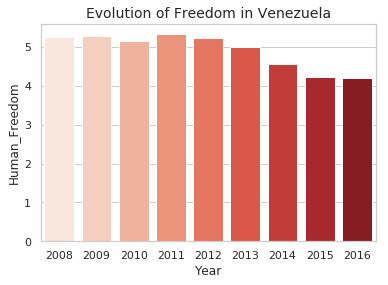

In [298]:
data_venezuela = data[(data['Country']=='Venezuela')]
data_venezuela = data_venezuela.sort_values(by='Year', ascending=False)

stats_venezuela = data_venezuela[columns_analysis]
stats_venezuela = stats_venezuela.set_index('Year')

display(stats_venezuela)
display(stats_venezuela.pct_change())

title = 'Evolution of Freedom in Venezuela'
sns.set(style="whitegrid")
ven_freedom = sns.barplot(x="Year", y="Human_Freedom", data=data_venezuela, palette="Reds")
plt.title(title, fontsize=14)

ven_civil_year = ((stats_venezuela.loc[2016, 'Civil_justice']/stats_venezuela.loc[2008, 'Civil_justice'])**(1/8)-1)*100
ven_civil = ((stats_venezuela.loc[2016, 'Civil_justice']/stats_venezuela.loc[2008, 'Civil_justice'])-1)*100
ven_freedom_year = ((stats_venezuela.loc[2016, 'Human_Freedom']/stats_venezuela.loc[2008, 'Human_Freedom'])**(1/8)-1)*100
ven_freedom = ((stats_venezuela.loc[2016, 'Human_Freedom']/stats_venezuela.loc[2008, 'Human_Freedom'])-1)*100

print("La variación ANUAL de la Justicia Social y de la Libertad en Venezuela durante los últimos 8 años ha sido respectivamente de un " + str(round(ven_civil_year, 2)) + "%, y de un " + str(round(ven_freedom_year, 2)) + "%.")
print("La variación TOTAL de la Justicia Social y de la Libertad en Venezuela entre 2008 y 2016 ha sido respectivamente de un " + str(round(ven_civil, 2)) + "%, y de un " + str(round(ven_freedom, 2)) + "%.")

In [299]:
corr1 = data['Civil_justice'].corr(data['Human_Freedom'])
corr2 = data_new_zealand['Civil_justice'].corr(data_new_zealand['Human_Freedom'])
corr3 = data_spain['Civil_justice'].corr(data_spain['Human_Freedom'])
corr4 = data_venezuela['Civil_justice'].corr(data_venezuela['Human_Freedom'])

display(corr1)
display(corr2)
display(corr3)
display(corr4)

0.7438282159389012

0.5141940226759175

0.7332869136280368

0.7532964934265396

In [300]:
corr5 = data['Year'].corr(data['Human_Freedom'])
corr6 = data_new_zealand['Year'].corr(data_new_zealand['Human_Freedom'])
corr7 = data_spain['Year'].corr(data_spain['Human_Freedom'])
corr8 = data_venezuela['Year'].corr(data_venezuela['Human_Freedom'])

display(corr5)
display(corr6)
display(corr7)
display(corr8)

-0.023583216525486703

0.2669684320054379

-0.1781002198498398

-0.8824380447277931

In [301]:
correlations = data.corr()
correlations

,Year,Civil_justice,Freedom_of_association,Freedom_of_expression,Same_sex_relationships,Personal_Freedom,Economic_Freedom,Human_Freedom
Year,1.000000,0.000153,0.048037,0.001670,0.045670,-0.053307,0.029794,-0.023583
Civil_justice,0.000153,1.000000,0.394854,0.574009,0.303907,0.718373,0.592036,0.743828
Freedom_of_association,0.048037,0.394854,1.000000,0.764900,0.415611,0.693249,0.288883,0.596703
Freedom_of_expression,0.001670,0.574009,0.764900,1.000000,0.435589,0.800407,0.461998,0.744021
Same_sex_relationships,0.045670,0.303907,0.415611,0.435589,1.000000,0.655252,0.279971,0.566966
Personal_Freedom,-0.053307,0.718373,0.693249,0.800407,0.655252,1.000000,0.599986,0.939322
Economic_Freedom,0.029794,0.592036,0.288883,0.461998,0.279971,0.599986,1.000000,0.838013
Human_Freedom,-0.023583,0.743828,0.596703,0.744021,0.566966,0.939322,0.838013,1.000000


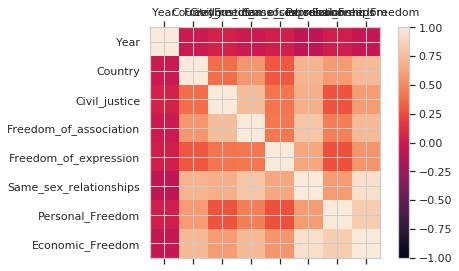

In [302]:
fig = plt.figure()
ax = fig.add_subplot(111)
subplotsize=[8.,8.]
figuresize=[10.,10.]   
left = 0.5*(1.-subplotsize[0]/figuresize[0])
right = 1.-left
bottom = 0.5*(1.-subplotsize[1]/figuresize[1])
top = 1.-bottom
fig.subplots_adjust(left=left,right=right,bottom=bottom,top=top)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data)
ax.set_yticklabels(data)
plt.show()

TypeError: expected x and y to have same length

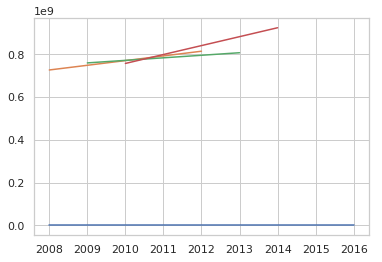

In [303]:
import pylab
from numpy import polyfit, poly1d, linspace
import matplotlib.pyplot as plt

data = [[5.257879, 2008, 12],
        [5.283514, 2009, 12],
        [5.156619, 2010, 12],
        [5.332458, 2011, 12],
        [5.225650, 2012, 12],
        [5.013857, 2013, 12],
        [4.573730, 2014, 12],
        [4.241750, 2015, 12],
        [4.200724, 2016, 12]]

freedom = [i[0] for i in data]
years = [i[1] for i in data]

plt.plot(years, freedom)

for i in range(0, len(data)-3):
    # interpolate values
    # you can choose for yourself how many point should be taken into account
    # as well as the degree of interpolation (the last variable mentioned)
    z = polyfit(years[i:i+3],values[i:i+3], 1)
    p = poly1d(z)
    # extrapolate interpolation by 1
    start_year = years[i]
    end_year = years[i+3] + 1
    # plot values 
    x = linspace(start_year, end_year, 10)

    y = p(x)
    plt.plot(x, y)

plt.show()

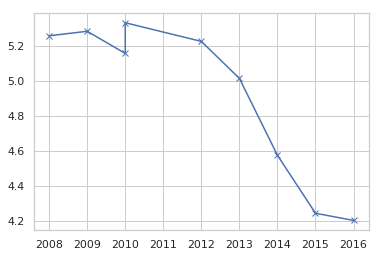

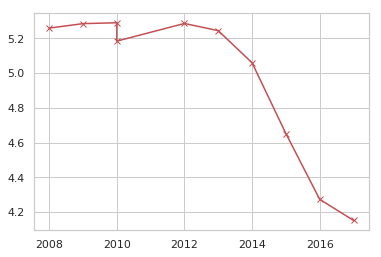

In [304]:
data_year = [2008,2009,2010,2010,2012,2013,2014,2015,2016]
data_freedom = [5.257879,5.283514,5.156619,5.332458,5.225650,5.013857,4.573730,4.241750,4.200724]

def holt_alg(h, y_last, y_pred, T_pred, alpha, beta):
    pred_y_new = alpha * y_last + (1-alpha) * (y_pred + T_pred * h)
    pred_T_new = beta * (pred_y_new - y_pred)/1 + (1-beta)*T_pred
    return (pred_y_new, pred_T_new)

def smoothing(t, y, alpha, beta):
    pred_y = y[1]
    pred_T = (y[1] - y[0])/(t[1]-t[0])
    y_hat = [y[0], y[1]]
    t.append(t[-1]+1)
    for i in range(2, len(t)):
        h = t[i] - t[i-1]
        pred_y, pred_T = holt_alg(h, y[i-1], pred_y, pred_T, alpha, beta)
        y_hat.append(pred_y)
    return y_hat 

pred = plt.plot(data_year, data_freedom, 'x-')
plt.show(True)

pred_y = smoothing(data_year, data_freedom, alpha=.8, beta=.5)
plt.plot(data_year[:len(pred_y)], pred_y, 'rx-')
plt.show()

In [305]:
table_top = pd.pivot_table(data_2016_top5, values=['Civil_justice', 'Human_Freedom'], index=['Year'], 
                       aggfunc={'Civil_justice': np.mean, 'Human_Freedom': np.mean})
table_last = pd.pivot_table(data_2016_last5, values=['Civil_justice', 'Human_Freedom'], index=['Year'], 
                       aggfunc={'Civil_justice': np.mean, 'Human_Freedom': np.mean})

display(table_top)
display(table_last)

,Civil_justice,Human_Freedom
Year,,
2016,7.804741,8.673351


,Civil_justice,Human_Freedom
Year,,
2016,3.960078,5.02559
